In [18]:
import pandas as pd


In [20]:
df = pd.read_csv('letter-recognition.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.iloc[:, 1 : 17]
y = df.select_dtypes(include = [object])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 10)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


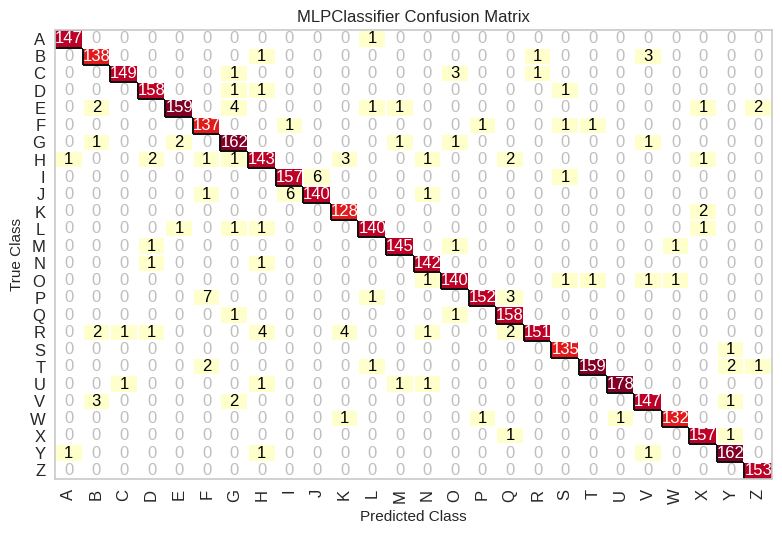

In [22]:
from yellowbrick.classifier import confusion_matrix
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')

cm = confusion_matrix(mlp, x_train_scaled, y_train.values.ravel(), x_test_scaled, y_test.values.ravel(), classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))



In [30]:
from sklearn.metrics import accuracy_score

cm.fit(x_train_scaled, y_train.values.ravel())
cm.score(x_test_scaled, y_test)

y_pred = cm.predict(x_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred))

print("\nActual vs Predicted values:")
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.96725

Actual vs Predicted values:
Actual: letter    C
Name: 19778, dtype: object, Predicted: C
Actual: letter    F
Name: 4376, dtype: object, Predicted: F
Actual: letter    O
Name: 10188, dtype: object, Predicted: O
Actual: letter    U
Name: 9887, dtype: object, Predicted: U
Actual: letter    Y
Name: 4441, dtype: object, Predicted: Y
Actual: letter    E
Name: 8455, dtype: object, Predicted: E
Actual: letter    C
Name: 6321, dtype: object, Predicted: C
Actual: letter    N
Name: 6328, dtype: object, Predicted: N
Actual: letter    M
Name: 4636, dtype: object, Predicted: M
Actual: letter    G
Name: 10347, dtype: object, Predicted: G
